# CareerCon 2019

Competition's data overview.

[Link to the competition](https://www.kaggle.com/c/career-con-2019/data).

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
from basedir import TRAIN, TARGET, TEST
from info import x_cols, y_cols
from utils import to_feather, from_feather

# Convert Into Binary Format

In [ ]:
x_trn = pd.read_csv(TRAIN, usecols=x_cols.keys(), dtype=x_cols)
y_trn = pd.read_csv(TARGET, usecols=y_cols.keys(), dtype=y_cols)
x_tst = pd.read_csv(TEST, usecols=x_cols.keys(), dtype=x_cols)

In [ ]:
x_trn.shape, y_trn.shape, x_tst.shape

In [ ]:
for name, df in (('x_trn', x_trn), ('y_trn', y_trn), ('x_tst', x_tst)):
    if 'row_id' in df.columns:
        del df['row_id']
    print(to_feather(df, name))

# The First Glance

In [17]:
def columns(df, pattern):
    index = df.columns.str.match(pattern)
    return df.columns[index]

In [19]:
def starts(df, string):
    return columns(df, f'^{string}')

In [4]:
x_trn, y_trn, x_tst = from_feather('x_trn', 'y_trn', 'x_tst')

In [9]:
ser0 = x_trn[x_trn.series_id == 0]
ser0.head()

,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532
1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003386,0.33995,1.5064,-9.4128
2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267
3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008973,0.42684,1.0993,-10.0960
4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410


In [7]:
x_trn.series_id.nunique()

3810

In [11]:
x_trn.groupby('series_id').measurement_number.count().unique()

array([128])

In [ ]:
orient_df = x_trn[columns(x_trn, 'orient')]

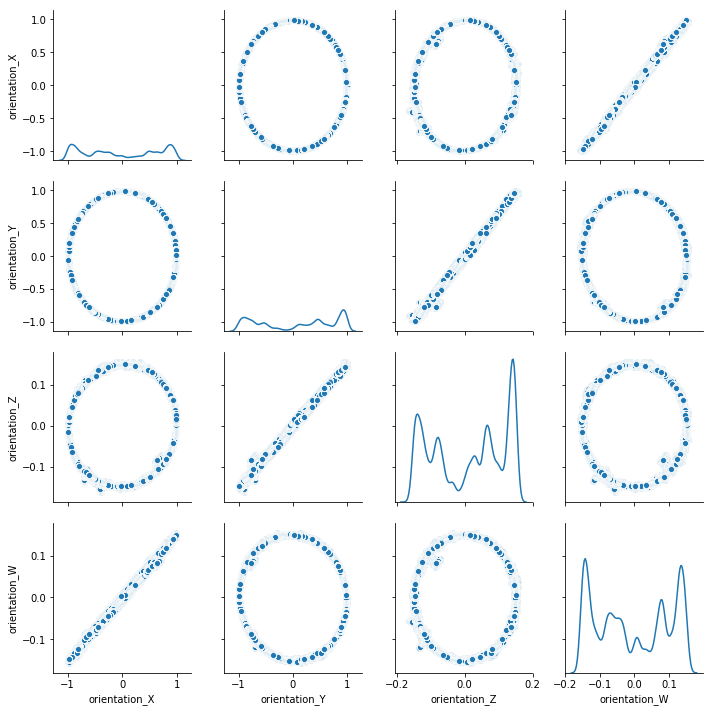

In [24]:
g = sns.PairGrid(orient_df)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.scatterplot)

In [29]:
cm = x_trn.corr()

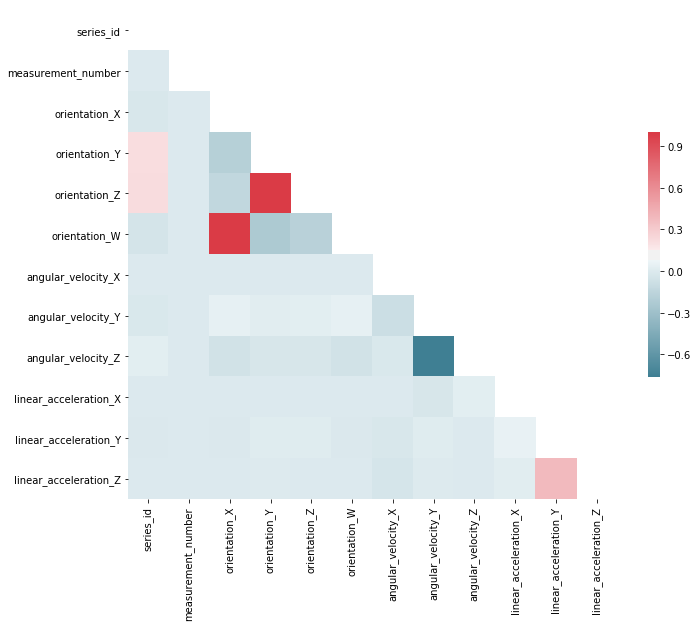

In [35]:
mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(cm, mask=mask, cmap=cmap, square=True, cbar_kws={'shrink': .5})